In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("50_Startups.csv")

In [3]:
dataset=pd.get_dummies(dataset,drop_first=True)

In [4]:
dataset.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'State_Florida', 'State_New York'],
      dtype='object')

In [5]:
independentCols = dataset[['R&D Spend', 'Administration', 'Marketing Spend','State_Florida', 'State_New York']]

In [6]:
dependentCols = dataset[['Profit']]

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test= train_test_split(independentCols , dependentCols, test_size=.30,random_state=0)

In [11]:
from sklearn.tree import DecisionTreeRegressor
regsor=DecisionTreeRegressor(criterion='friedman_mse', splitter='random')
regsor=regsor.fit(x_train,y_train)

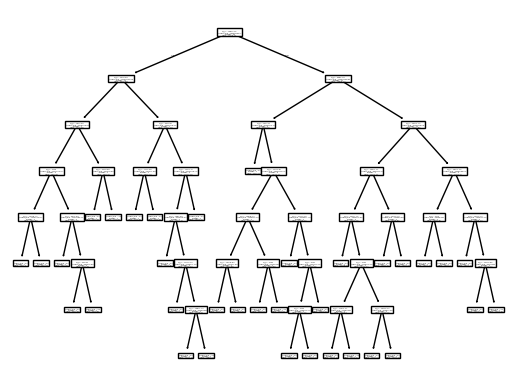

In [13]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regsor)
plt.show()

In [14]:
y_pred=regsor.predict(x_test)

In [16]:
from sklearn.metrics import r2_score
rscore=r2_score(y_test,y_pred)

In [17]:
rscore

0.9107442863909039

In [21]:
import pickle
filename= "finalized_model_DT.sav"
pickle.dump(regsor,open(filename,"wb"))

In [22]:
loaded_model=pickle.load(open("finalized_model_DT.sav",'rb'))
result=loaded_model.predict([[1234,345,4565,1,0]])

C:\Users\tpous\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [23]:
result

array([14681.4])